# Desarrollo de Aplicaciones con Visión Artificial: Transformaciones geométricas

En este notebook aprenderás a implementar transformaciones geométricas sobre una imagen.

## Transformación de imágenes

Operaciones comunes en visión artificial son transformar las imágenes. Veamos como rotamos una imagen usando una matriz de transformación e
interpolación bilineal.

In [ ]:
!pip install plotly --upgrade

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
import plotly

plotly.__version__

In [ ]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/cameraman.tif

In [ ]:
def interpolar(I, coord):
    if coord[0] < 0 or coord[0] > (I.shape[1]-1) or coord[1] < 0 or coord[1] > (I.shape[0] - 1):
        return 0
    
    minx = math.floor(coord[0])
    maxx = math.ceil(coord[0])
    miny = math.floor(coord[1])
    maxy = math.ceil(coord[1])
    
    dx = coord[0] - minx
    dy = coord[1] - miny
    
    val1 = I[miny,minx]
    val2 = I[miny,maxx]
    val3 = I[maxy,maxx]
    val4 = I[maxy,minx]
    
    val11 = val1*(1-dx) + dx*val2
    val22 = val4*(1-dx) + dx*val3
    
    return val22*(1-dy) + dy*val11

def rotarImagen(I, centro, angulo, dim_salida):
    salida = np.zeros(dim_salida, dtype=np.uint8)
    angle = np.radians(angulo)
    
    T1 = np.array([[1.0, 0.0, -centro[0]]
                   ,[0.0, 1.0, -centro[1]]
                   ,[0.0, 0.0, 1.0]])
    T2 = np.array([[np.cos(angle), np.sin(angle), 0.0]
                   ,[-np.sin(angle), np.cos(angle), 0.0]
                   ,[0.0, 0.0, 1.0]])
    T3 = np.array([[1.0, 0.0, centro[0]]
                   ,[0.0, 1.0, centro[1]]
                   ,[0.0, 0.0, 1.0]])
    
    T = T3 @ T2 @ T1
    T = np.linalg.inv(T)
        
    #Iteramos sobre las posiciones de la salida
    for i in range(salida.shape[0]):
        for j in range(salida.shape[1]):
            coord = np.zeros((3,1), dtype=np.float) # [x,y,1]
            coord[0] = j
            coord[1] = i
            coord[2] = 1.0
            new_coord = T @ coord
            salida[i,j] = interpolar(I, new_coord)
    
    return salida

In [ ]:
im = cv2.imread('cameraman.tif',0)

rows, cols = im.shape

im2 = rotarImagen(im, centro=(cols/2, rows/2), angulo=30, dim_salida=(rows, cols))

fig = px.imshow(im, binary_string=True)
fig.show()

fig = px.imshow(im2, binary_string=True)
fig.show()

Podemos aplicar implementaciones más eficientes como las de OpenCV. Por ejemplo, veamos cómo escalar y rotar una imagen.

In [ ]:
img = cv2.imread('cameraman.tif')
print('Original shape:', img.shape)

result = cv2.resize(img, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
print('Resized shape:', result.shape)

Y la operación de rotación.

In [ ]:
rows, cols, _ = img.shape

M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
# Sirve para rotacion, escala, traslacion y cortar
result = cv2.warpAffine(img, M, (cols, rows))

fig = px.imshow(img, binary_string=True)
fig.show()

fig = px.imshow(result, binary_string=True)
fig.show()

## Ejercicio

* Crear una función que realice un flip horizontal sobre una imagen.
* Crear una función que realice un flip vertical sobre una imagen.

In [ ]:
img_fliph = img[:,::-1,:]

img_flipv = img[::-1,:,:]

fig = px.imshow(img_fliph, binary_string=True)
fig.show()

fig = px.imshow(img_flipv, binary_string=True)
fig.show()

## Transformación de perspectiva

Una transformación más general es la transformación en perspectiva que permite corregir objetos con deformaciones más complejas.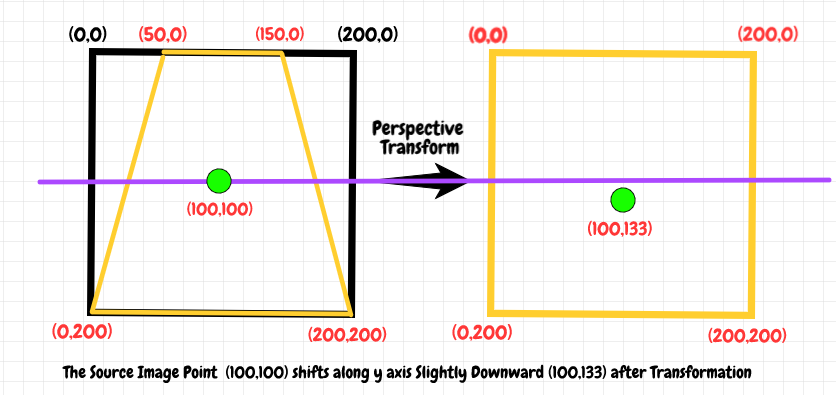

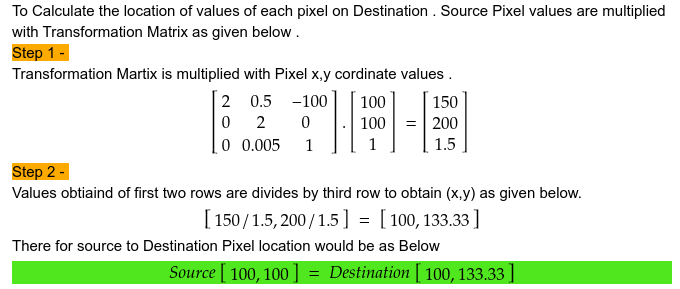

[http://jlouthan.github.io/perspective-transform/examples/test-ui/index.html](http://jlouthan.github.io/perspective-transform/examples/test-ui/index.html)

In [ ]:
!wget https://github.com/diplomado-ia-pucp/dava/raw/main/documento.jpg

In [ ]:
#Leemos la imagen a corregir
img = cv2.imread('documento.jpg')
img = img[:,:,::-1]

fig = px.imshow(img)
fig.show()

In [ ]:
# Definimos los puntos de las esquinas del papel
# Dibujamos los puntos y el poligono en la imagen
puntos = np.float32([[736,1169],[2403,1136], [3067,3775 ],[144, 3829]])

imgDibujo = img.copy()

for i in range(0, 4):
  cv2.circle(imgDibujo, tuple(puntos[i]), 30, (255,0,0), -1)

pts = puntos.reshape((-1,1,2))
cv2.polylines(imgDibujo, [pts.astype(np.int32)], True, (0,255,0), thickness=10)

fig = px.imshow(imgDibujo)
fig.show()

In [ ]:
width = 500
height = 700

# Hacemos la transformacion
target = np.float32([[0,0],[width,0],[width,height],[0,height]])

matrix = cv2.getPerspectiveTransform(puntos, target)

result = cv2.warpPerspective(img, matrix, (width,height))

fig = px.imshow(result, height=700)
fig.show()

## Tarea 2

Realizar la transformación de una imagen arbitraria con perspectiva y rotación

In [ ]:
!wget https://github.com/josegustavo/dava/raw/main/13244242.jpg

In [ ]:
#Leemos la imagen a corregir
originalImg = cv2.imread('13244242.jpg')
originalImg = originalImg[:,:,::-1]

fig = px.imshow(originalImg)
fig.show()


In [ ]:
rows, cols, _ = originalImg.shape

M = cv2.getRotationMatrix2D((cols/2, rows/2), -30, 1)
# Sirve para rotacion, escala, traslacion y cortar
rotatedImg = cv2.warpAffine(originalImg, M, (cols, rows))

fig = px.imshow(rotatedImg, binary_string=True)
fig.show()

In [ ]:
# Definimos los puntos de las esquinas del papel
# Dibujamos los puntos y el poligono en la imagen
puntos = np.float32([[1360,1172],[1977,1202], [2213,1709 ],[1565, 1679]])

imgDibujo = rotatedImg.copy()

for i in range(0, 4):
  cv2.circle(imgDibujo, tuple(puntos[i]), 30, (0,255,0), -1)

pts = puntos.reshape((-1,1,2))
cv2.polylines(imgDibujo, [pts.astype(np.int32)], True, (0,0,255), thickness=10)

fig = px.imshow(imgDibujo)
fig.show()

In [ ]:
width = 500
height = 500

# Hacemos la transformacion
target = np.float32([[0,0],[width,0],[width,height],[0,height]])

matrix = cv2.getPerspectiveTransform(puntos, target)

croppedImg = cv2.warpPerspective(rotatedImg, matrix, (width,height))

fig = px.imshow(croppedImg, height=500)
fig.show()